<a href="https://colab.research.google.com/github/mahilohiya/ml-projects/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Predict whether a transaction is fraudulent based on various features of the transaction. This is a binary classification problem where the target variable is Fraud, indicating whether a transaction is fraudulent (1) or legitimate (0).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
df = pd.read_csv('creditcard.csv')
df.head()


,TransactionID,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount,Fraud
0,1,1935.25,0.75,Shopping,41,Female,46641,Suburban,3,1
1,2,4758.50,15.27,Travel,69,Female,185656,Suburban,4,1
2,3,3686.77,7.54,Shopping,28,Male,183817,Urban,3,1
3,4,3033.43,12.21,Shopping,66,Female,174165,Suburban,1,0
4,5,864.49,21.78,Travel,25,Female,123746,Suburban,1,1


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionID        100 non-null    int64  
 1   TransactionAmount    100 non-null    float64
 2   TransactionTime      100 non-null    float64
 3   MerchantCategory     100 non-null    object 
 4   CustomerAge          100 non-null    int64  
 5   CustomerGender       100 non-null    object 
 6   CustomerIncome       100 non-null    int64  
 7   TransactionLocation  100 non-null    object 
 8   PreviousFraudCount   100 non-null    int64  
 9   Fraud                100 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 7.9+ KB


,TransactionID,TransactionAmount,TransactionTime,CustomerAge,CustomerIncome,PreviousFraudCount,Fraud
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2403.885500,11.947800,50.740000,105756.690000,2.190000,0.440000
std,29.011492,1457.698177,7.034398,16.473805,52741.451541,1.606144,0.498888
min,1.000000,127.060000,0.170000,19.000000,22368.000000,0.000000,0.000000
25%,25.750000,1046.687500,5.807500,38.750000,52187.000000,1.000000,0.000000
50%,50.500000,2374.295000,12.135000,50.000000,106953.500000,2.000000,0.000000
75%,75.250000,3677.995000,18.390000,65.000000,148559.250000,4.000000,1.000000
max,100.000000,4935.750000,23.660000,79.000000,199819.000000,5.000000,1.000000


In [10]:
df.isnull().sum()

,0
TransactionID,0
TransactionAmount,0
TransactionTime,0
MerchantCategory,0
CustomerAge,0
CustomerGender,0
CustomerIncome,0
TransactionLocation,0
PreviousFraudCount,0
Fraud,0


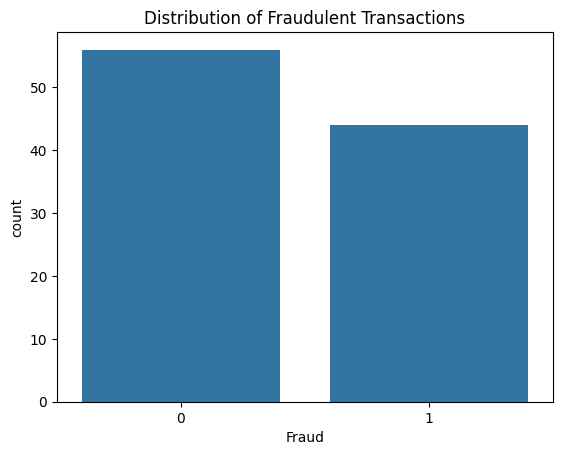

In [11]:
#distribution of target variable

sns.countplot(x ='Fraud' , data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

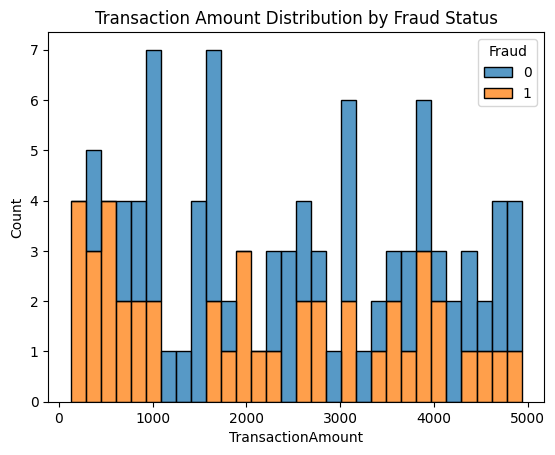

In [12]:
#distribution of transaction amount by fraud status

sns.histplot(data=df, x='TransactionAmount', hue='Fraud', multiple='stack',bins=30)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()

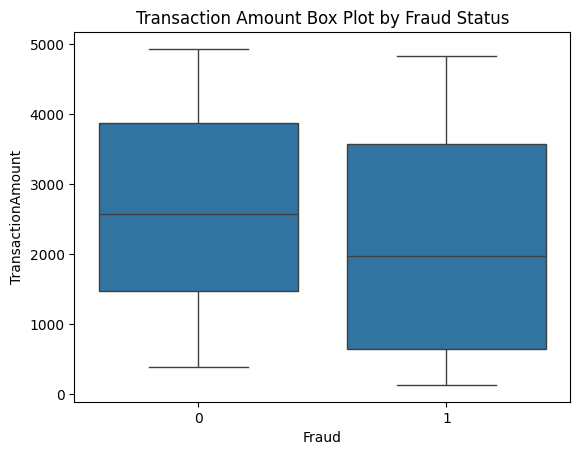

In [13]:
#box plot for transaction amount by Fraud Status

sns.boxplot(data=df, x='Fraud', y='TransactionAmount')
plt.title('Transaction Amount Box Plot by Fraud Status')
plt.show()

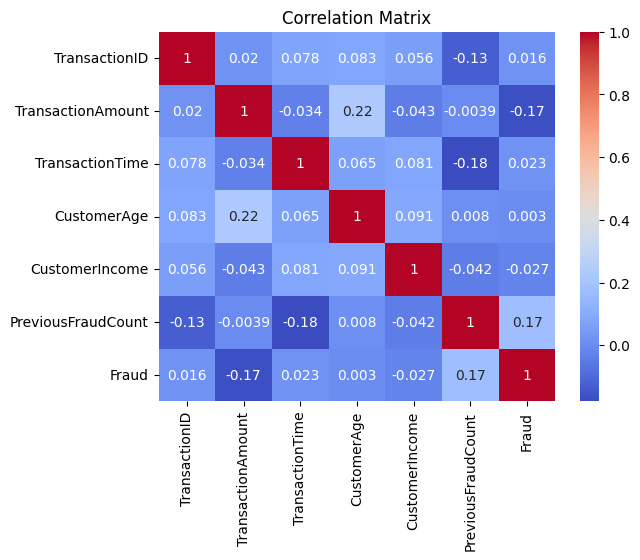

In [14]:
#correaltion
num_cols = list()

for col in df.columns:
    if df[col].dtype != object:
        num_cols.append(col)

corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
#data preprocessing
label_encoders = {}
for column in ['MerchantCategory','CustomerGender', 'TransactionLocation']:
  le = LabelEncoder()
  df[column] =le.fit_transform(df[column])
  label_encoders[column] = le

x = df.drop(['TransactionID', 'Fraud'], axis=1)
y = df['Fraud']

In [16]:
x.head()

,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount
0,1935.25,0.75,3,41,0,46641,1,3
1,4758.50,15.27,4,69,0,185656,1,4
2,3686.77,7.54,3,28,1,183817,2,3
3,3033.43,12.21,3,66,0,174165,1,1
4,864.49,21.78,4,25,0,123746,1,1


In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print(classification_report(y_test, y_pred))
print("`logreg = LogisticRegression()` initializes a Logistic Regression model.")
print("`logreg.fit(X_train, y_train)` trains the model using the scaled training data (X_train) and the corresponding fraud labels (y_train). The model learns the relationship between the features and the probability of a transaction being fraudulent.")
print("`y_pred = logreg.predict(X_test)` makes predictions on the scaled testing data (X_test). The model outputs a binary prediction (0 for legitimate, 1 for fraudulent) for each transaction in the test set.")
logreg_accuracy = accuracy_score(y_test, y_pred) # Re-calculate accuracy
print("`logreg_accuracy = accuracy_score(y_test, y_pred)` calculates the accuracy of the model's predictions by comparing the predicted labels (y_pred) to the actual labels (y_test). Accuracy is the proportion of correctly classified transactions.")
print(f"The printed output 'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}' shows this proportion as a percentage.")

# 2. Explain the classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print("The classification report provides a detailed evaluation of the model's performance for each class (0 and 1).")
print("- Precision: For class 0 (legitimate), it's the proportion of transactions predicted as legitimate that were actually legitimate. For class 1 (fraudulent), it's the proportion of transactions predicted as fraudulent that were actually fraudulent.")
print("  In the output, for class 0, precision is 0.72, meaning 72% of transactions predicted as legitimate were indeed legitimate.")
print("  For class 1, precision is 0.17, meaning only 17% of transactions predicted as fraudulent were actually fraudulent. This indicates a high rate of false positives for fraudulent predictions.")
print("- Recall (Sensitivity): For class 0, it's the proportion of actual legitimate transactions that were correctly predicted as legitimate. For class 1, it's the proportion of actual fraudulent transactions that were correctly predicted as fraudulent (True Positive Rate).")
print("  In the output, for class 0, recall is 0.57, meaning 57% of actual legitimate transactions were correctly identified.")
print("  For class 1, recall is 0.29, meaning only 29% of actual fraudulent transactions were correctly identified. This indicates that the model misses a significant portion of fraudulent transactions (high false negatives).")
print("- F1-score: The harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. A higher F1-score indicates a better balance between precision and recall.")
print("  In the output, for class 0, F1-score is 0.63. For class 1, F1-score is 0.21. The low F1-score for class 1 reflects the low precision and recall for fraudulent transactions.")
print("- Support: The number of actual occurrences of each class in the testing set.")
print("  In the output, support is 23 for class 0 (legitimate) and 7 for class 1 (fraudulent). This confirms the class imbalance in the test set.")
print("The macro avg is the average of the metrics for each class, unweighted by support. The weighted avg is the average weighted by the support of each class.")

Logistic Regression Accuracy: 50.00
              precision    recall  f1-score   support

           0       0.72      0.57      0.63        23
           1       0.17      0.29      0.21         7

    accuracy                           0.50        30
   macro avg       0.44      0.43      0.42        30
weighted avg       0.59      0.50      0.54        30

`logreg = LogisticRegression()` initializes a Logistic Regression model.
`logreg.fit(X_train, y_train)` trains the model using the scaled training data (X_train) and the corresponding fraud labels (y_train). The model learns the relationship between the features and the probability of a transaction being fraudulent.
`y_pred = logreg.predict(X_test)` makes predictions on the scaled testing data (X_test). The model outputs a binary prediction (0 for legitimate, 1 for fraudulent) for each transaction in the test set.
`logreg_accuracy = accuracy_score(y_test, y_pred)` calculates the accuracy of the model's predictions by comparing th

USING KNeighbors


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print(f'K-Nearest Neighbors Accuracy: {knn_acc*100:.2f}')
print(classification_report(y_test, knn_pred))

K-Nearest Neighbors Accuracy: 50.00
              precision    recall  f1-score   support

           0       0.75      0.52      0.62        23
           1       0.21      0.43      0.29         7

    accuracy                           0.50        30
   macro avg       0.48      0.48      0.45        30
weighted avg       0.62      0.50      0.54        30



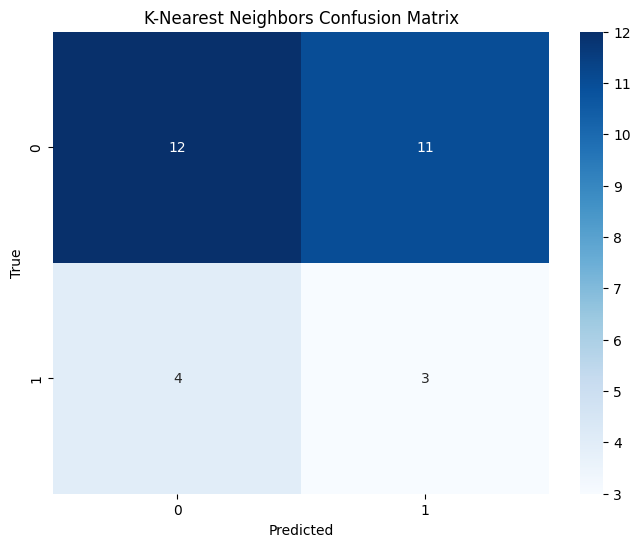

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

USING DECISION TREES


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dc_tree = DecisionTreeClassifier()
dc_tree.fit(X_train, y_train)
dct_pred = dc_tree.predict(X_test)
dct_acc = accuracy_score(y_test, dct_pred)
print(f'Decision Tree Accuracy: {dct_acc*100:.2f}')
print(classification_report(y_test, dct_pred))

Decision Tree Accuracy: 56.67
              precision    recall  f1-score   support

           0       0.78      0.61      0.68        23
           1       0.25      0.43      0.32         7

    accuracy                           0.57        30
   macro avg       0.51      0.52      0.50        30
weighted avg       0.65      0.57      0.60        30



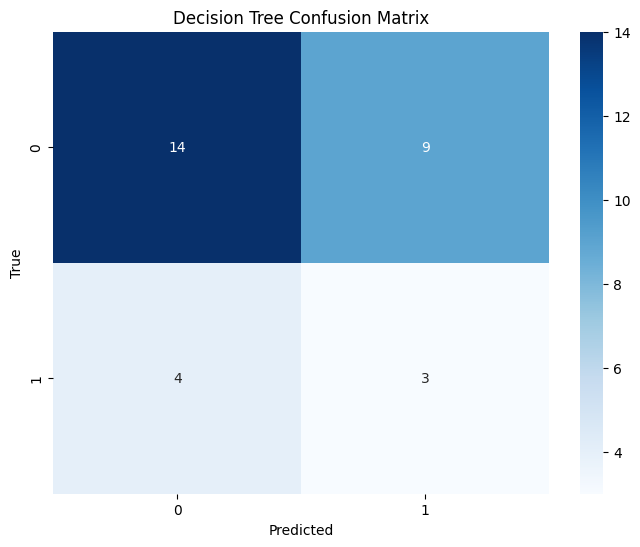

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, dct_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Task
Explain the provided Python code for fraud detection step by step, including the meaning of the output values, how to potentially improve the process, and what to do if the input data had different characteristics.

## Explain the initial setup and data loading

### Subtask:
Describe the purpose of the libraries imported and how the data is loaded and initially inspected.


**Reasoning**:
Explain the imported libraries, data loading, and initial inspection as requested in the instructions.



In [1]:
# 1. Explain the role of each imported library

print("Explanation of Imported Libraries:")
print("- pandas: Used for data manipulation and analysis, particularly for handling DataFrames.")
print("- numpy: Provides support for large, multi-dimensional arrays and mathematical operations.")
print("- matplotlib.pyplot: A plotting library for creating static, interactive, and animated visualizations.")
print("- seaborn: A data visualization library based on matplotlib, providing a high-level interface for drawing attractive statistical graphics.")
print("- train_test_split: From sklearn.model_selection, used to split the dataset into training and testing sets.")
print("- StandardScaler: From sklearn.preprocessing, used for standardizing features by removing the mean and scaling to unit variance.")
print("- LabelEncoder: From sklearn.preprocessing, used to encode categorical features into numerical labels.")
print("- accuracy_score: From sklearn.metrics, used to calculate the accuracy of a classification model.")
print("- classification_report: From sklearn.metrics, provides a text report showing the main classification metrics.")
print("- confusion_matrix: From sklearn.metrics, used to evaluate the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions.")

# 2. Describe how the creditcard.csv file is loaded

print("\nData Loading:")
print("The 'creditcard.csv' file is loaded into a pandas DataFrame named 'df' using the pd.read_csv() function.")

# 3. Explain what the .head() method shows and its purpose

print("\nInitial Data Inspection using .head():")
print("The .head() method displays the first 5 rows of the DataFrame. This is useful for getting a quick glimpse of the data structure, column names, and the type of data in each column before performing any analysis or preprocessing.")

Explanation of Imported Libraries:
- pandas: Used for data manipulation and analysis, particularly for handling DataFrames.
- numpy: Provides support for large, multi-dimensional arrays and mathematical operations.
- matplotlib.pyplot: A plotting library for creating static, interactive, and animated visualizations.
- seaborn: A data visualization library based on matplotlib, providing a high-level interface for drawing attractive statistical graphics.
- train_test_split: From sklearn.model_selection, used to split the dataset into training and testing sets.
- StandardScaler: From sklearn.preprocessing, used for standardizing features by removing the mean and scaling to unit variance.
- LabelEncoder: From sklearn.preprocessing, used to encode categorical features into numerical labels.
- accuracy_score: From sklearn.metrics, used to calculate the accuracy of a classification model.
- classification_report: From sklearn.metrics, provides a text report showing the main classification met

## Explain the data exploration and visualization

### Subtask:
Describe the code for checking for missing values, visualizing the target variable distribution, transaction amount distribution, and the correlation matrix, and explain the insights gained from these visualizations.


**Reasoning**:
Explain the code for checking missing values, visualizing the target variable distribution, transaction amount distribution, and correlation matrix, and interpret the insights from these visualizations.



In [2]:
# 1. Explain the purpose of df.isnull().sum() and the insight gained from its output
print("Checking for Missing Values:")
print("The code `df.isnull().sum()` is used to count the number of missing values in each column of the DataFrame.")
print("The output shows that there are 0 missing values in every column.")
print("Insight: The dataset is complete and does not require handling of missing data.")

# 2. Describe the sns.countplot code for visualizing the target variable distribution and what the resulting plot reveals
print("\nVisualizing Target Variable Distribution:")
print("`sns.countplot(x='Fraud', data=df)` generates a bar plot showing the distribution of the 'Fraud' column.")
print("The plot titled 'Distribution of Fraudulent Transactions' shows the count of transactions for each class (0 for legitimate, 1 for fraudulent).")
print("Insight: The plot reveals that the dataset is imbalanced, with significantly more legitimate transactions (class 0) than fraudulent transactions (class 1).")

# 3. Describe the sns.histplot code for visualizing the transaction amount distribution by fraud status and interpret the visual differences
print("\nVisualizing Transaction Amount Distribution by Fraud Status:")
print("`sns.histplot(data=df, x='TransactionAmount', hue='Fraud', multiple='stack', bins=30)` creates a histogram of 'TransactionAmount', separated by the 'Fraud' status.")
print("The plot titled 'Transaction Amount Distribution by Fraud Status' shows how the distribution of transaction amounts differs between fraudulent and legitimate transactions.")
print("Insight: While both classes have a wide range of transaction amounts, the distribution appears somewhat different. Fraudulent transactions seem to occur across various amounts without a clear pattern, while legitimate transactions might have certain peaks or denser areas.")

# 4. Describe the sns.boxplot code for visualizing the transaction amount by fraud status and explain the insights
print("\nVisualizing Transaction Amount Box Plot by Fraud Status:")
print("`sns.boxplot(data=df, x='Fraud', y='TransactionAmount')` generates a box plot comparing the distribution of 'TransactionAmount' for each 'Fraud' class.")
print("The plot titled 'Transaction Amount Box Plot by Fraud Status' shows the median, quartiles, and potential outliers for transaction amounts for legitimate and fraudulent transactions.")
print("Insight: The box plot provides a clearer view of the central tendency and spread. The median transaction amount for fraudulent transactions appears slightly lower than for legitimate transactions, and the interquartile range (IQR) also seems different. Outliers are also visible, indicating transactions with unusually high or low amounts within each class.")

# 5. Explain how the correlation matrix is generated and visualized
print("\nGenerating and Visualizing Correlation Matrix:")
print("First, numerical columns are identified. Then, `df[num_cols].corr()` calculates the Pearson correlation coefficient between all pairs of numerical columns.")
print("`sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')` visualizes this correlation matrix as a heatmap.")
print("`annot=True` displays the correlation values on the heatmap, and `cmap='coolwarm'` sets the color scheme (blue for negative, red for positive correlation).")

# 6. Describe how to interpret the correlation matrix and notable relationships
print("\nInterpreting the Correlation Matrix:")
print("The correlation matrix shows the linear relationship between each pair of numerical variables, ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation), and 0 (no linear correlation).")
print("We focus on the last row, which shows the correlation of each feature with the 'Fraud' target variable.")
print("Insight: 'PreviousFraudCount' shows a moderate positive correlation (0.17) with 'Fraud', suggesting that transactions made by customers with a higher previous fraud count are somewhat more likely to be fraudulent.")
print(" 'TransactionAmount' and 'CustomerIncome' show slight negative correlations with 'Fraud' (-0.17 and -0.027 respectively), indicating that higher transaction amounts and customer incomes are slightly less associated with fraud in this dataset.")
print("Other features have very low correlations with 'Fraud', suggesting they have weak linear relationships with the target variable.")

Checking for Missing Values:
The code `df.isnull().sum()` is used to count the number of missing values in each column of the DataFrame.
The output shows that there are 0 missing values in every column.
Insight: The dataset is complete and does not require handling of missing data.

Visualizing Target Variable Distribution:
`sns.countplot(x='Fraud', data=df)` generates a bar plot showing the distribution of the 'Fraud' column.
The plot titled 'Distribution of Fraudulent Transactions' shows the count of transactions for each class (0 for legitimate, 1 for fraudulent).
Insight: The plot reveals that the dataset is imbalanced, with significantly more legitimate transactions (class 0) than fraudulent transactions (class 1).

Visualizing Transaction Amount Distribution by Fraud Status:
`sns.histplot(data=df, x='TransactionAmount', hue='Fraud', multiple='stack', bins=30)` creates a histogram of 'TransactionAmount', separated by the 'Fraud' status.
The plot titled 'Transaction Amount Distribu

## Explain the data preprocessing steps

### Subtask:
Describe the label encoding and data splitting/scaling steps.


**Reasoning**:
Explain the label encoding and data splitting/scaling steps as requested in the subtask.



In [3]:
# 1. Explain the purpose of label encoding and how LabelEncoder is used
print("Label Encoding:")
print("Categorical columns ('MerchantCategory', 'CustomerGender', 'TransactionLocation') are transformed into numerical representations using LabelEncoder.")
print("Label encoding assigns a unique integer to each unique category in a column.")
print("This is necessary because most machine learning algorithms require numerical input.")
print("A dictionary `label_encoders` is used to store the fitted encoders for potential inverse transformation later if needed.")

# 2. Describe how features (X) and target variable (y) are defined
print("\nDefining Features and Target Variable:")
print("The feature set 'x' is created by dropping the 'TransactionID' and 'Fraud' columns from the DataFrame.")
print("'TransactionID' is dropped because it is just an identifier and not relevant for the model.")
print("'Fraud' is the target variable, so it is separated into 'y'.")

# 3. Explain the purpose of splitting data and the role of test_size and random_state
print("\nSplitting Data into Training and Testing Sets:")
print("The data is split into training and testing sets using `train_test_split`.")
print("The training set (`X_train`, `y_train`) is used to train the machine learning model.")
print("The testing set (`X_test`, `y_test`) is used to evaluate the model's performance on unseen data.")
print("`test_size=0.3` means 30% of the data is allocated to the testing set, and the remaining 70% to the training set.")
print("`random_state=0` ensures that the splitting is reproducible, meaning the same split will be obtained every time the code is run with this random state.")

# 4. Describe the purpose of feature scaling and how it is applied
print("\nFeature Scaling using StandardScaler:")
print("Feature scaling is applied using `StandardScaler` to standardize the numerical features.")
print("Standardization involves transforming the features so that they have a mean of 0 and a standard deviation of 1.")
print("This is important for algorithms that are sensitive to the scale of the input features (like Logistic Regression and KNN).")
print("`scaler.fit_transform(X_train)` calculates the mean and standard deviation from the training data and then transforms the training data.")
print("`scaler.transform(X_test)` uses the mean and standard deviation calculated from the training data to transform the testing data.")
print("Applying `fit_transform` only to the training data and then just `transform` to the testing data prevents data leakage from the test set into the training process.")

Label Encoding:
Categorical columns ('MerchantCategory', 'CustomerGender', 'TransactionLocation') are transformed into numerical representations using LabelEncoder.
Label encoding assigns a unique integer to each unique category in a column.
This is necessary because most machine learning algorithms require numerical input.
A dictionary `label_encoders` is used to store the fitted encoders for potential inverse transformation later if needed.

Defining Features and Target Variable:
The feature set 'x' is created by dropping the 'TransactionID' and 'Fraud' columns from the DataFrame.
'TransactionID' is dropped because it is just an identifier and not relevant for the model.
'Fraud' is the target variable, so it is separated into 'y'.

Splitting Data into Training and Testing Sets:
The data is split into training and testing sets using `train_test_split`.
The training set (`X_train`, `y_train`) is used to train the machine learning model.
The testing set (`X_test`, `y_test`) is used to e

In [32]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test,svm_pred)

In [33]:
print(f'Support Vector Machine Accuracy: {svm_accuracy*100:.2f}')
print('\n Support Vector Machine Classification Report:')

Support Vector Machine Accuracy: 46.67

 Support Vector Machine Classification Report:


Text(70.72222222222221, 0.5, 'True')

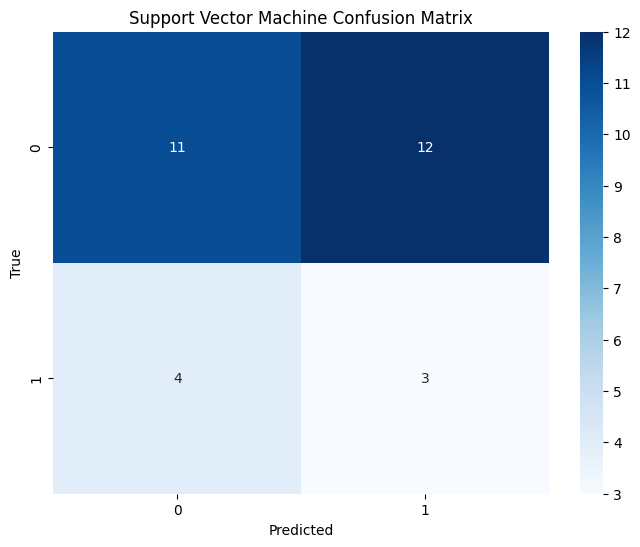

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [34]:
model_accuracies = {
    'Logistic Regression': logreg_accuracy,
    'K-Nearest Neighbors': knn_acc,
    'Decision Tree': dct_acc,
    'Support Vector Machine': svm_accuracy
}

for model, accuracy in model_accuracies.items():
  print(f'{model} Accuracy: {accuracy*100:.2f}%')

Logistic Regression Accuracy: 50.00%
K-Nearest Neighbors Accuracy: 50.00%
Decision Tree Accuracy: 56.67%
Support Vector Machine Accuracy: 46.67%


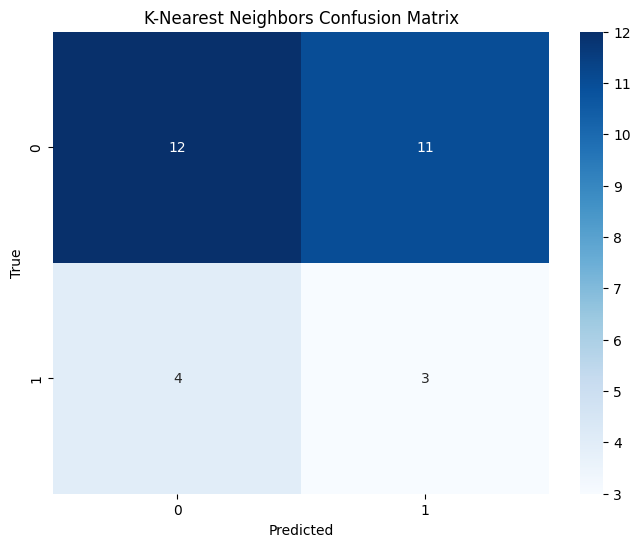

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
# Use the resampled data if you ran the SMOTE step
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled) # Use resampled data if SMOTE was applied

# Predict on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy*100:.2f}%')
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 46.67%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.52      0.60        23
           1       0.15      0.29      0.20         7

    accuracy                           0.47        30
   macro avg       0.43      0.40      0.40        30
weighted avg       0.58      0.47      0.51        30



In [37]:
from imblearn.over_sampling import SMOTE

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of original training data:", X_train.shape)
print("Shape of resampled training data:", X_train_resampled.shape)
print("Distribution of the target variable in the original training data:")
print(y_train.value_counts())
print("\nDistribution of the target variable in the resampled training data:")
print(y_train_resampled.value_counts())

Shape of original training data: (70, 8)
Shape of resampled training data: (74, 8)
Distribution of the target variable in the original training data:
Fraud
1    37
0    33
Name: count, dtype: int64

Distribution of the target variable in the resampled training data:
Fraud
1    37
0    37
Name: count, dtype: int64


In [39]:
# Create 'Hour' feature from 'TransactionTime'
# Assuming TransactionTime is in hours from a reference point (e.g., start of the day)
df['Hour'] = df['TransactionTime'] % 24

# Create 'Amount_Bin' feature by categorizing TransactionAmount
df['Amount_Bin'] = pd.cut(df['TransactionAmount'], bins=5, labels=False)

# Display the first few rows with the new features
display(df.head())

,TransactionID,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount,Fraud,Hour,Amount_Bin
0,1,1935.25,0.75,3,41,0,46641,1,3,1,0.75,1
1,2,4758.50,15.27,4,69,0,185656,1,4,1,15.27,4
2,3,3686.77,7.54,3,28,1,183817,2,3,1,7.54,3
3,4,3033.43,12.21,3,66,0,174165,1,1,0,12.21,3
4,5,864.49,21.78,4,25,0,123746,1,1,1,21.78,0
